In [61]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
def reduce_mem(df):
    starttime = time.time()
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if pd.isnull(c_min) or pd.isnull(c_max):
                continue
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('-- Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction),time spend:{:2.2f} min'.format(end_mem,
                                                                                                           100*(start_mem-end_mem)/start_mem,
                                                                                                           (time.time()-starttime)/60))
    return df

In [3]:
df = pd.read_csv("US_Accidents_June20.csv")
display(df)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513612,A-3513776,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,...,False,False,False,False,False,False,Day,Day,Day,Day
3513613,A-3513777,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,...,False,False,False,False,False,False,Day,Day,Day,Day
3513614,A-3513778,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,...,False,False,False,False,False,False,Day,Day,Day,Day
3513615,A-3513779,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
def dataframeInformations(df):
  totalEntryList=[]
  totalMissingValueList=[]
  missingValRateList=[]
  dataTypeList=[]
  uniqueValuesList=[]
  totalUniqueValList=[]
  variableNameList=[]
  
  for element in df.columns:
    missingValRate=round((df[element].isna().sum()/len(df[element]))*100,2) #to show correct decimal and float part of number.
    totalEntryList.append(len(df[element]))
    totalMissingValueList.append(df[element].isna().sum())
    missingValRateList.append(missingValRate)
    dataTypeList.append(df[element].dtype)
    uniqueValuesList.append(list(df[element].unique()))
    totalUniqueValList.append(len(df[element].unique()))
    variableNameList.append(element)
  #create a dataframe to show all informations together
  dataInfoDf=pd.DataFrame({'Variable':variableNameList,'Total_Entry':totalEntryList,\
                           'Missing_Value':totalMissingValueList,'Missing_Value_Per':missingValRateList,\
                           'Data_Type':dataTypeList,'Unique_Values':uniqueValuesList,\
                           'Uniques_Values_Count':totalUniqueValList})
  return dataInfoDf.sort_values(by="Variable")

In [5]:
dataInfo=dataframeInformations(df)
variableList=[element for element in dataInfo['Variable'] ]
dataInfo=dataInfo.set_index('Variable')
dataInfo

,Total_Entry,Missing_Value,Missing_Value_Per,Data_Type,Unique_Values,Uniques_Values_Count
Variable,,,,,,
Airport_Code,3513617,6758,0.19,object,"[KFFO, KCMH, KI69, KDAY, KMGY, KTZR, KOSU, KLC...",2002
Amenity,3513617,0,0.00,bool,"[False, True]",2
Astronomical_Twilight,3513617,115,0.00,object,"[Night, Day, nan]",3
Bump,3513617,0,0.00,bool,"[False, True]",2
City,3513617,112,0.00,object,"[Dayton, Reynoldsburg, Williamsburg, Westervil...",11896
Civil_Twilight,3513617,115,0.00,object,"[Night, Day, nan]",3
Country,3513617,0,0.00,object,[US],1
County,3513617,0,0.00,object,"[Montgomery, Franklin, Clermont, Licking, Fair...",1724
Crossing,3513617,0,0.00,bool,"[False, True]",2


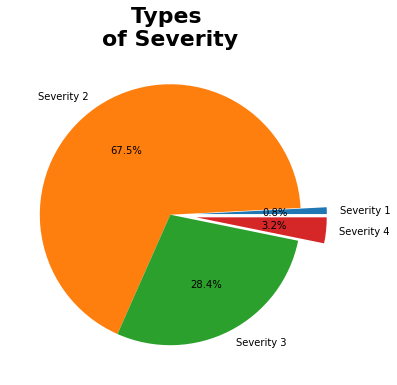

In [6]:
df_sev = df.groupby('Severity').size()
df_sev = df_sev[[1,2,3,4]]
cases = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']
plt.figure(figsize=(10, 6))
plt.pie(df_sev,
        labels= cases,
        explode = (0.2,0,0,0.2), #moving slices apart
        autopct = ('%1.1f%%')) #to display %
plt.title('Types \nof Severity', weight='heavy', fontsize=22);

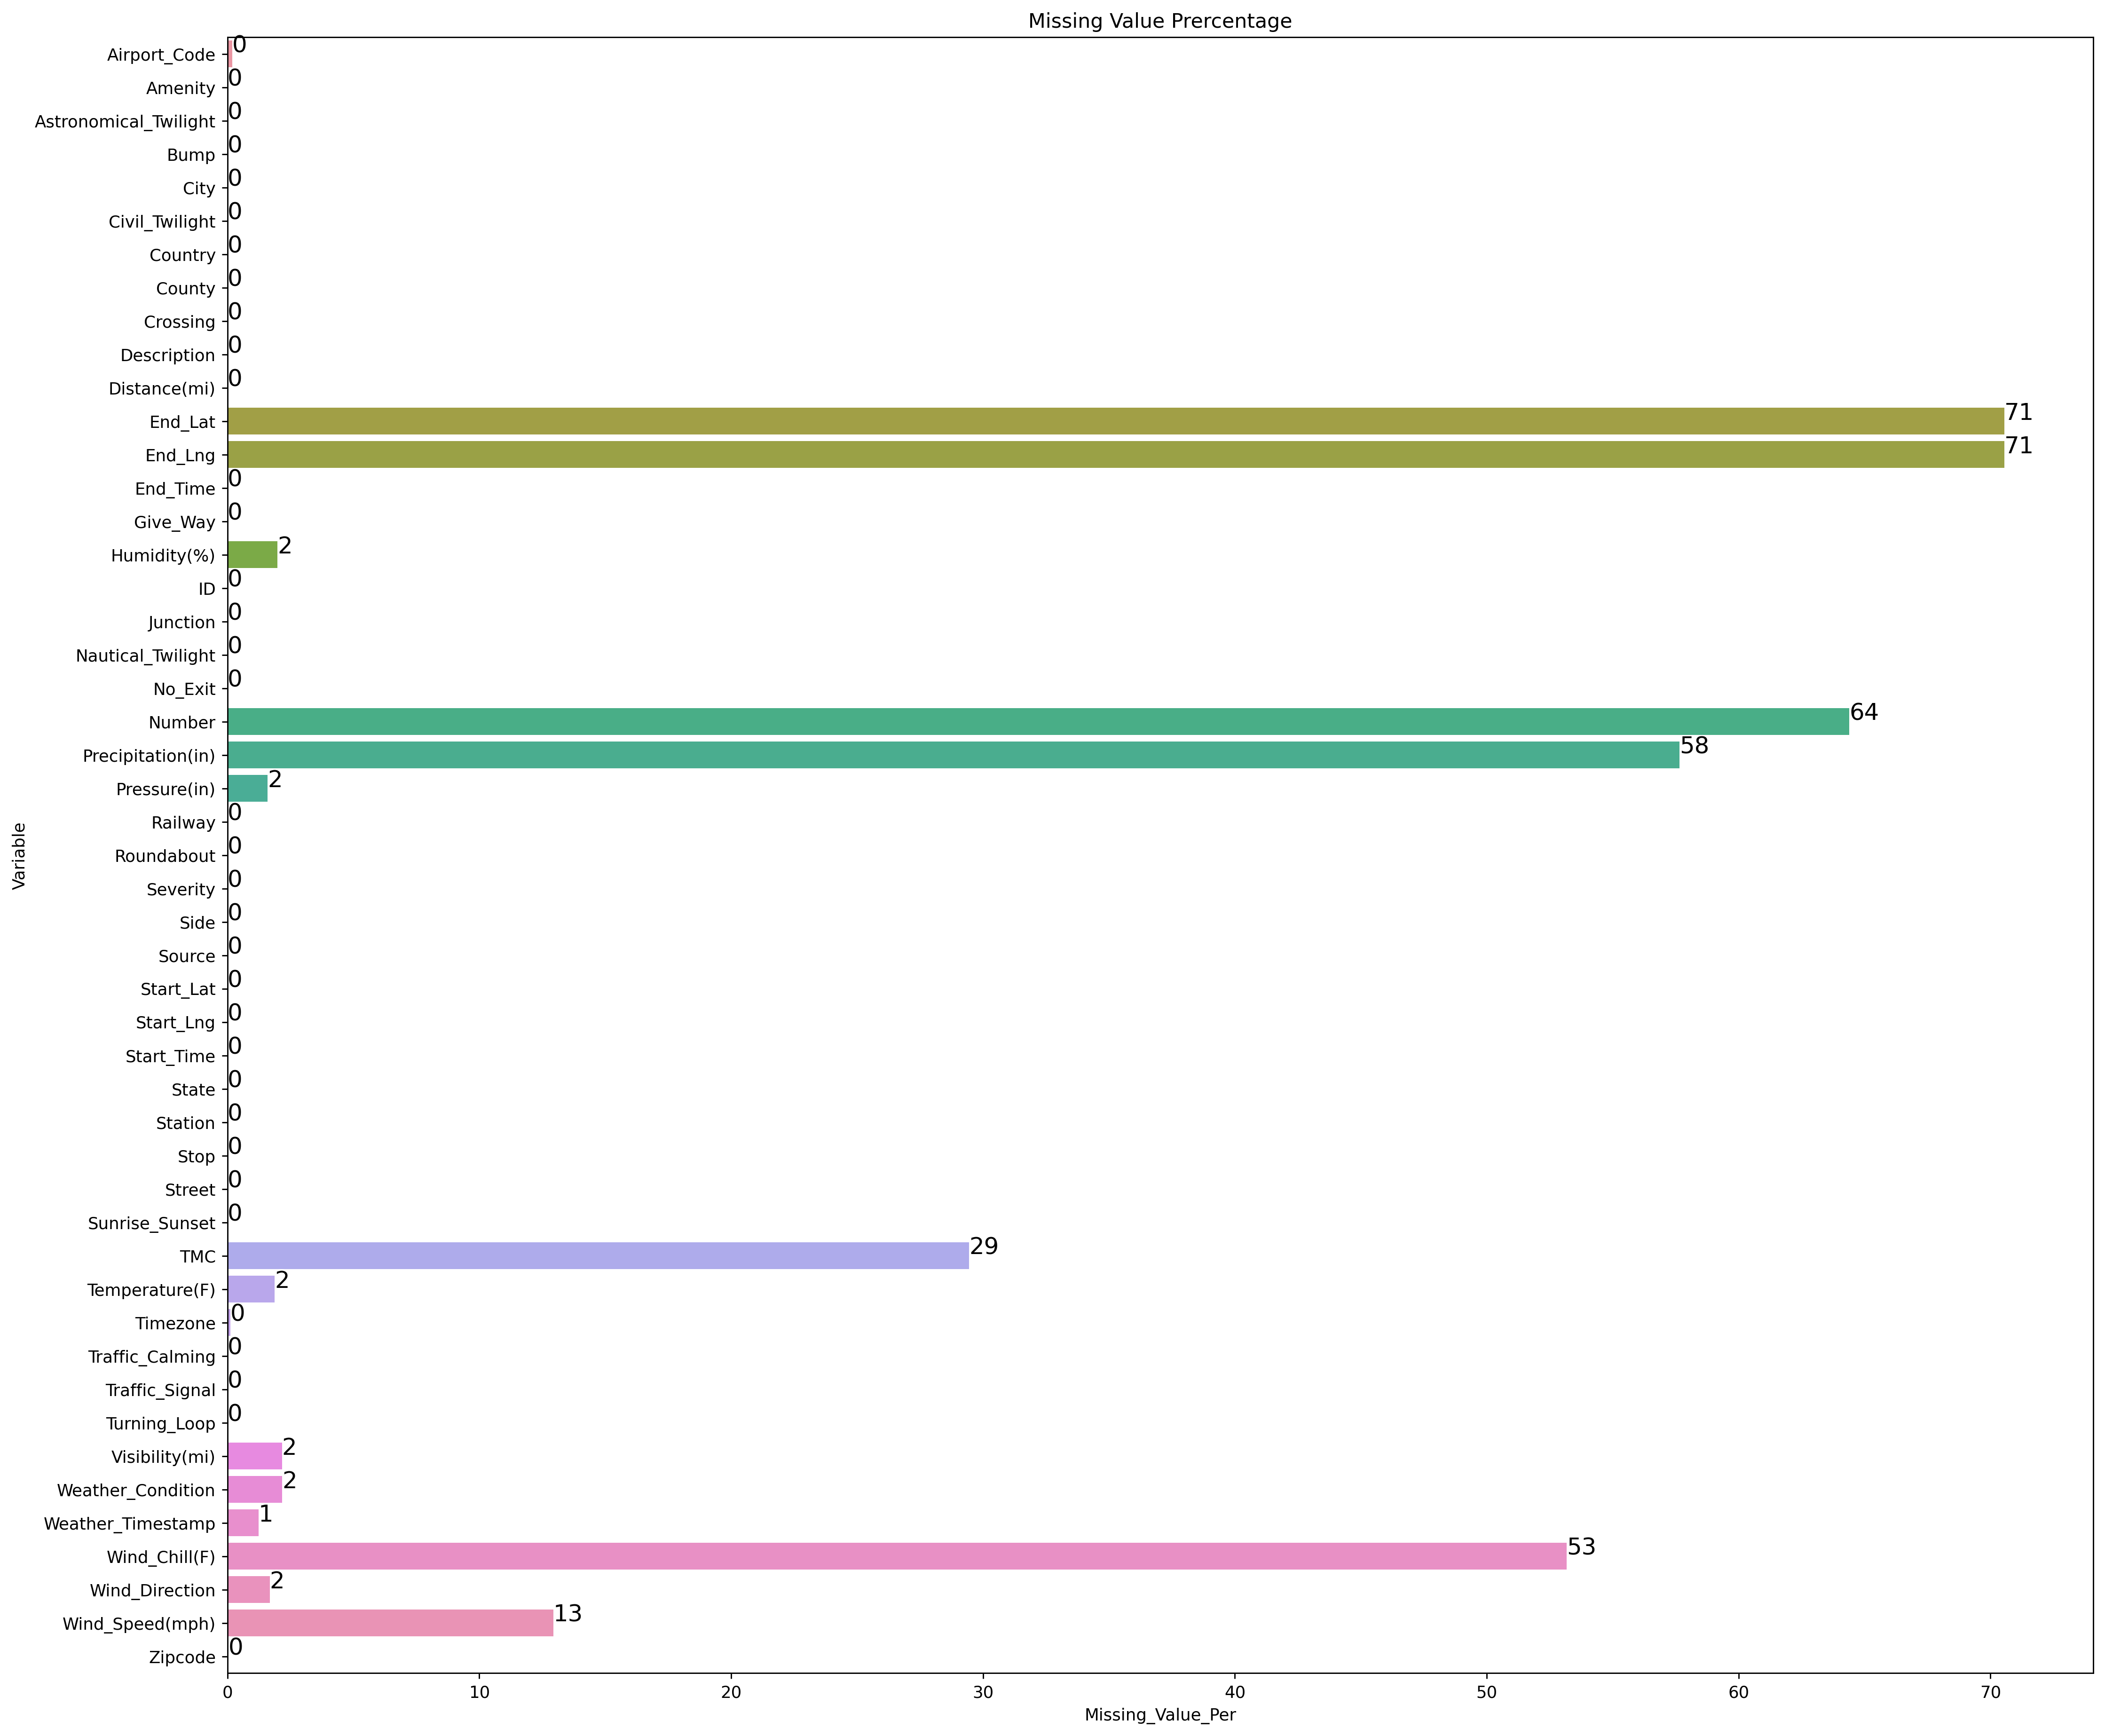

In [28]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20,18), dpi=256, facecolor='w', edgecolor='r')
plt.title("Missing Value Prercentage")
sns.barplot(dataInfo.Missing_Value_Per,dataInfo.index)
#plt.show()
# yüzdeler 0'la yüz arasında olcak şekilde yaparsak daha iyi olur

for i, (value, name) in enumerate(zip(dataInfo.Missing_Value_Per, dataInfo.index)):
        plt.text(value, i,     "",           size=14, weight=600, ha='right', va='bottom')
        plt.text(value, i-.25,     f'{value:,.0f}',  size=14, ha='left',  va='center')



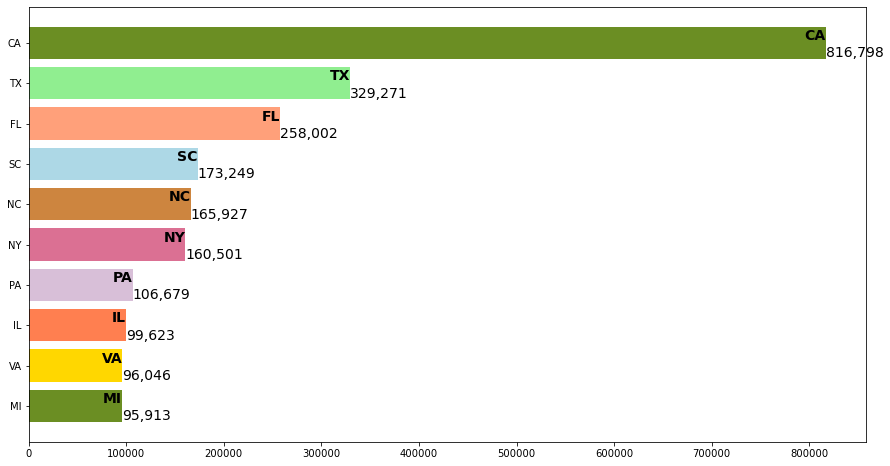

In [19]:
df_st = df.groupby('State').size().to_frame('Counts')
df_st = df_st.reset_index().sort_values('Counts', ascending = False)[:10]
df_st = df_st[::-1]   # flip values from top to bottom

colors = ['olivedrab', 'gold', 'coral', 'thistle',
     'palevioletred', 'peru', 'lightblue', 'lightsalmon', 'lightgreen']

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(df_st['State'], df_st['Counts'], color = colors)

for i, (value, name) in enumerate(zip(df_st['Counts'], df_st['State'])):
        ax.text(value, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value, i-.25,     f'{value:,.0f}',  size=14, ha='left',  va='center')

In [64]:
df_st_ct = pd.value_counts(df['State'])

fig = go.Figure(data=go.Choropleth(
    locations=df_st_ct.index,
    z = df_st_ct.values.astype(float),  
    locationmode = 'USA-states',     
    colorscale = 'YlOrRd',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [9]:
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Clear|Fair',na=False), 'Clear')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Cloud|Overcast',na=False), 'Cloud')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Rain|storm|T-Storm|Thunder',na=False), 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms|Vicinity',na=False), 'Heavy_Rain')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Snow|Sleet|Ice',na=False), 'Snow')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls',na=False), 'Heavy_Snow')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Fog|Haze|Mist|Smoke|Light Haze',na=False), 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Hail',na=False), 'Hail')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Drizzle',na=False), 'Drizzle')
df['Weather_Condition'] = df['Weather_Condition'].mask(df['Weather_Condition'].str.contains('Volcanic|Sand|Dust|Tornado|Whirls',na=False), 'Misc weather disturbances')

In [10]:
df[(df['Weather_Condition']=='N/A Precipitation')] = np.nan
df[(df['Weather_Condition']=='Wintry Mix')] = np.nan
df[(df['Weather_Condition']=='Wintry Mix / Windy')] = np.nan

In [50]:
df.Weather_Condition.unique()

array(['Rain', 'Cloud', 'Snow', 'Fog', 'Clear', 'Drizzle', nan,
       'Misc weather disturbances', 'Hail', 'Heavy_Rain', 'Heavy_Snow'],
      dtype=object)

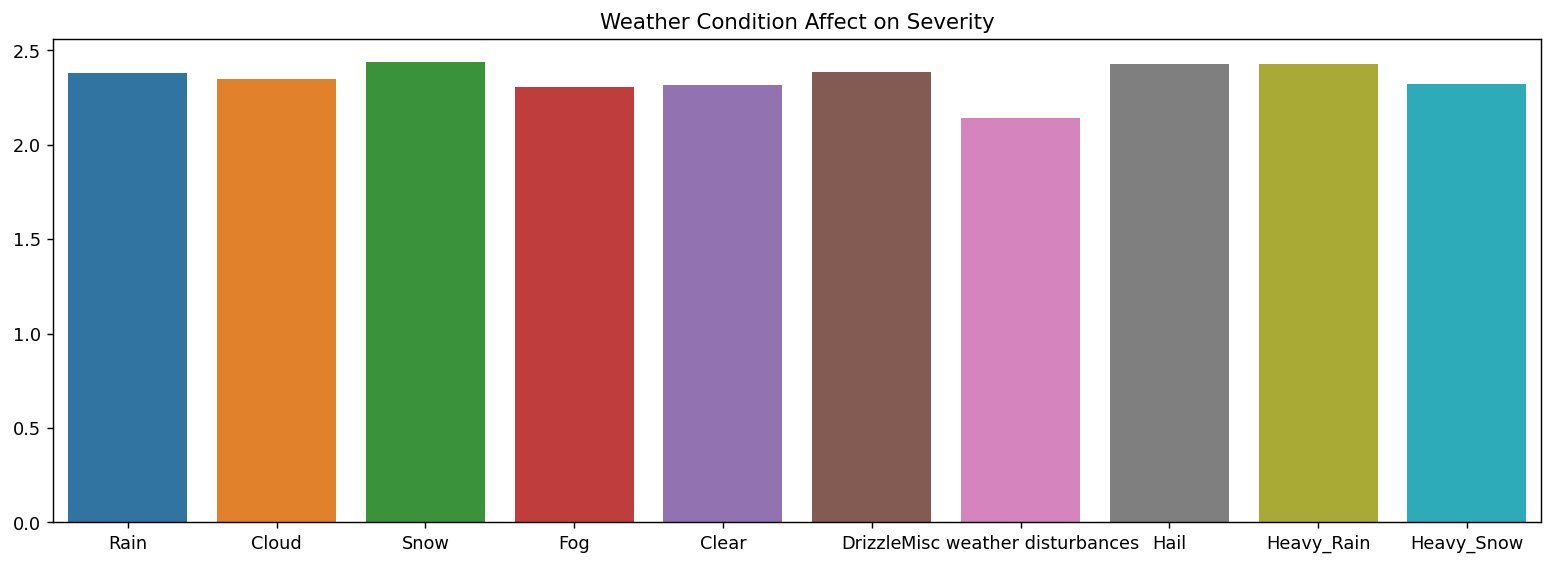

In [63]:
weather_condition_sev_mean = []
for i in df.Weather_Condition.unique():
    if(i != np.nan):
        weather_condition_sev_mean.append(df[df.Weather_Condition == i].Severity.mean())

figure(num=None, figsize=(15,5), dpi=128, facecolor='w', edgecolor='r')
plt.title("Weather Condition Affect on Severity")
sns.barplot(df.Weather_Condition.unique(),values)

In [58]:
df[df.Weather_Condition!=np.nan].Weather_Condition.value_counts(sort = False)

Rain                          268923
Heavy_Snow                        37
Hail                              35
Misc weather disturbances        417
Snow                           59843
Heavy_Rain                       416
Cloud                        1644570
Fog                            81082
Clear                        1363877
Drizzle                        16138
Name: Weather_Condition, dtype: int64

TypeError: 'value' must be an instance of str or bytes, not a float

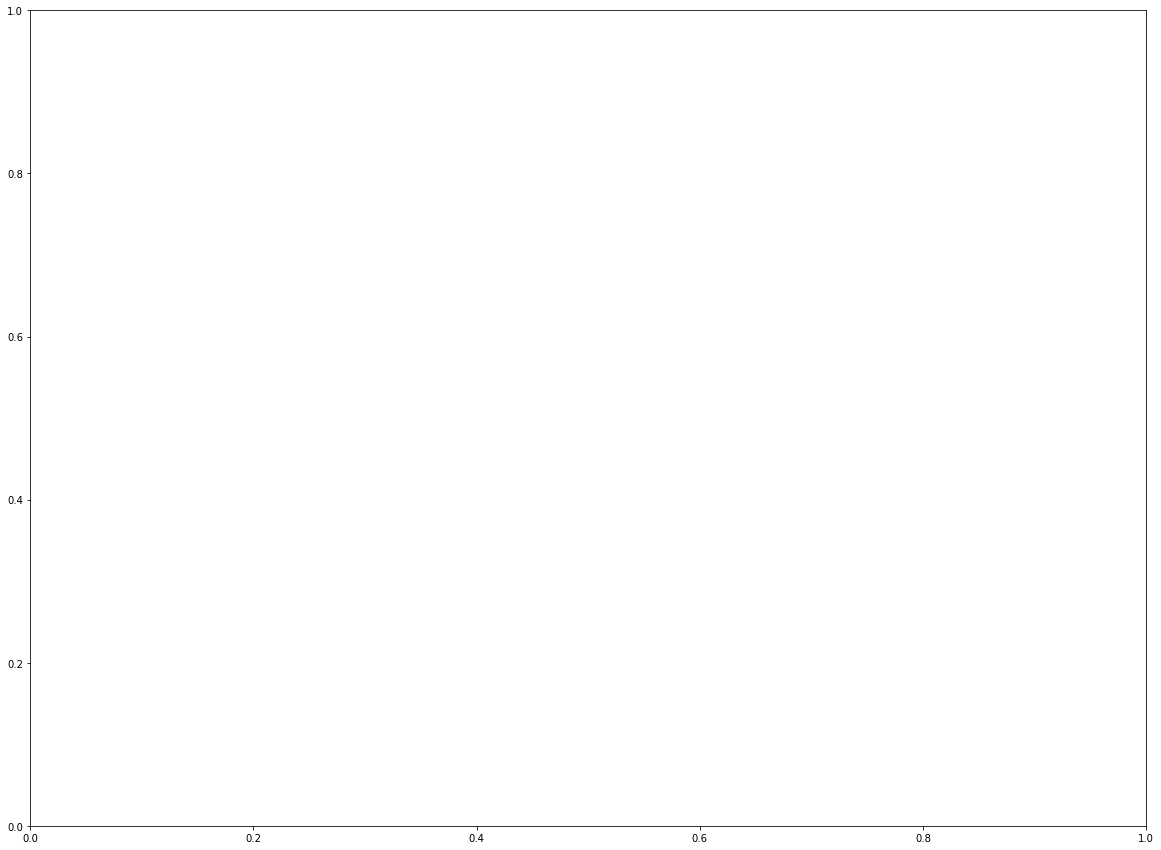

In [36]:
state = df.State.unique()
severity_1 = []
severity_2 = []
severity_3 = []
severity_4 = []
for i in df.State.unique():
    severity_1.append(df[(df['Severity']==1)&(df['State']==i)].count()['ID'])
    severity_2.append(df[(df['Severity']==2)&(df['State']==i)].count()['ID'])
    severity_3.append(df[(df['Severity']==3)&(df['State']==i)].count()['ID'])
    severity_4.append(df[(df['Severity']==4)&(df['State']==i)].count()['ID'])
    

    
plt.figure(figsize=(20,15))

plt.bar(df.State.unique(), severity_1, label='Severity 1')
plt.bar(df.State.unique(), severity_2, label='Severity 2')
plt.bar(df.State.unique(), severity_3, label='Severity 3')
plt.bar(df.State.unique(), severity_4, label='Severity 4')


plt.legend()

#şunu bir türlü çalıştıramadım

In [ ]:
df['Year'] = df['Start_Time'].dt.year
nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth
df['Weekday']= df['Start_Time'].dt.weekday
days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday
df['Hour'] = df['Start_Time'].dt.hour
df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute